<h1> <center> Implementation of K-means Clusterting </center> </h1>
<hr></hr>

<h2> <b>Step 1:</b> Importing all the required packages. </h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

<hr></hr>
<h2> <b>Step 2:</b> Accessing, Importing, Clearning, and Pre-Processing Data </h2>

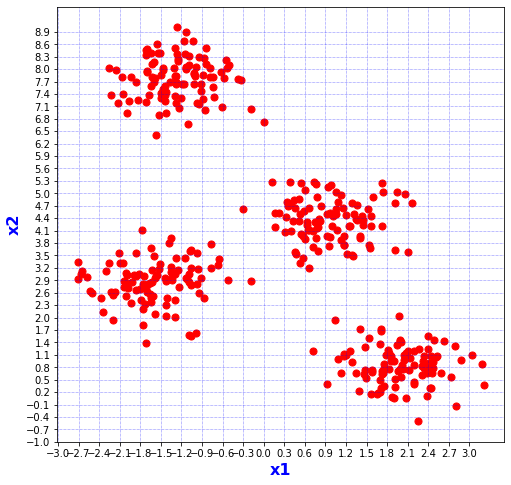

In [ ]:
# Since we don't have data at the moment, so we are creating fake dataset as follows:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.5, random_state=0)


# Visualizing the data
plt.figure(figsize = (8, 8))
plt.scatter(x[:, 0], x[:, 1], s = 50, c = 'r')
plt.grid(visible = True, which = 'both', axis = 'both', color = 'b', linestyle = ':', linewidth = 0.5)
plt.xticks(ticks = np.arange(np.floor(np.min(x[:,0])), np.max(x[:,0]), 0.3))
plt.yticks(ticks = np.arange(np.floor(np.min(x[:,1])), np.max(x[:,1]), 0.3))
plt.xlabel('x1', color = 'b', size = 16, fontweight = 'bold')
plt.ylabel('x2', color = 'b', size = 16, fontweight = 'bold')
plt.show()

<hr></hr>

**Explanation:** In above lines of code, we

1. First, imported the `make_blobs` class from 'datasets` module of `sklearn` package.
2. In the second line: `x, y = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.5, random_state=0) `

  i. `n_samples = 400` specifying the number of examples in our training dataset. In the given case, there are 400 examples, and each example has 2 features or attributes.
  
  ii. `centers = 4` defines the number of clusters or centroids. **Please note that in real-world example, we might not have the information regarding number of clusters or centroid, and this is one of the challenge for K-means clustering algorithm.**

  iii. `cluster_std = 0.5` specifies the dipersion or variance amond different features within a cluster. 

  iv. `random_state = 0` is used to generate the same result each time.


**Also, please note that in above lines, we have return two arguments: X and y; where X represents the features of our dataset, and y denotes the labels associated with each label. However, in real-world examples, we will not have any information regarding labels, that is, our dataset would be unlabeled.**





<hr></hr>
<h2><b> Step 3: Using Scikit-Learn Library for K-means Clustering</b></h2>

We, will use the Sckit-Learn library to process our randomly generated dataset as follows:

In [ ]:
Kmean = KMeans(n_clusters = 4)
Kmean.fit(x)

KMeans(n_clusters=4)

<hr></hr>

We can find the location of trained or optimized centroid using the `cluster_centers_`method as follows:

In [ ]:
centroid = Kmean.cluster_centers_
print('The locations of the optimal centroids:\n {}'.format(centroid))

The locations of the optimal centroids:
 [[ 0.95472047  4.35791907]
 [-1.26551713  7.7693112 ]
 [-1.59920898  2.86006273]
 [ 1.97306689  0.84915787]]


<hr></hr>
Let’s display the cluster centroids using different color for better understanding.
<hr></hr>


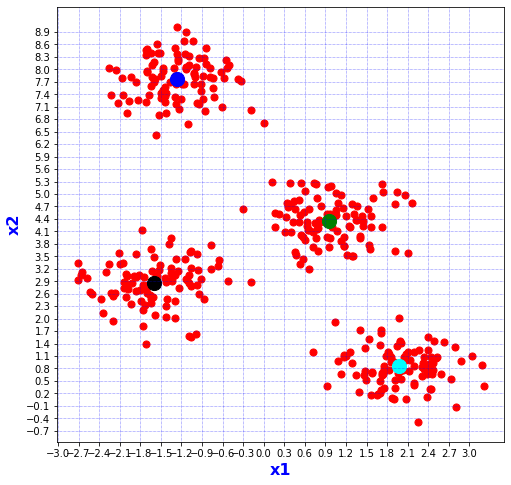

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(x[:, 0], x[:, 1], s = 50, c = 'r')
plt.grid(visible = True, which = 'both', axis = 'both', color = 'b', linestyle = ':', linewidth = 0.5)
plt.xticks(ticks = np.arange(np.floor(np.min(x[:,0])), np.max(x[:,0]), 0.3))
plt.yticks(ticks = np.arange(np.floor(np.min(x[:,1])), np.max(x[:,1]), 0.3))
plt.xlabel('x1', color = 'b', size = 16, fontweight = 'bold')
plt.ylabel('x2', color = 'b', size = 16, fontweight = 'bold')
plt.scatter(centroid[0,0],centroid[0,1], s=200, c='g', marker='o')
plt.scatter(centroid[1,0],centroid[1,1],  s=200, c='b', marker='o')
plt.scatter(centroid[2,0],centroid[2,1], s=200, c='black', marker='o')
plt.scatter(centroid[3,0],centroid[3,1],  s=200, c='cyan', marker='o')
plt.show()

<hr></hr>
<h2><b> Step 4: Predicting Future Values</b></h2>

Let's say we have a value `[-1.36038524,  7.68433515]`, and we want to see which cluster it belong to? We can do that by using the `predict` method as follows:

In [ ]:
new_value = np.array([[-1.36038524,  7.68433515],
                      [0.5285368 , 4.49723858],
                      [-1.6353788 ,  3.14057889],
                      [2.19522982, 0.84858847]])
predicted_y = Kmean.predict(new_value)

print('The first input with featues {} belong to CLass {}\nThe seond input with featues {} belong to CLass {}\nThe third input with featues {} belong to CLass {}\nThe fourth input with featues {} belong to CLass {}\n'.
      format(new_value[0,:],predicted_y[0], 
             new_value[1,:],predicted_y[1],
             new_value[2,:],predicted_y[2],
             new_value[3,:],predicted_y[3]))

The first input with featues [-1.36038524  7.68433515] belong to CLass 1
The seond input with featues [0.5285368  4.49723858] belong to CLass 0
The third input with featues [-1.6353788   3.14057889] belong to CLass 2
The fourth input with featues [2.19522982 0.84858847] belong to CLass 3



<hr></hr>
<h1><b><center><u>OPTIONAL</u></center></b></h1>

Let's plot the decision boundary for better understanding. Please note that to plot the decision boundary, we need to have the information of true labels. whereas, for unlabled data, we don't have information of labels, so for k-means clustering, we cannot plot the decision boundary. However, here for the sake of understanding, we are plotting it using the labels, y. 

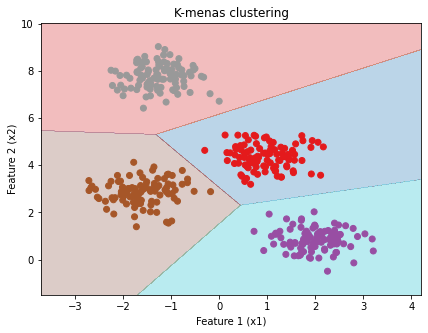

In [ ]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))
X = np.c_[xx.ravel(), yy.ravel()]
Z = Kmean.predict(X)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.xlim(xx.min(), xx.max())
plt.title('K-menas clustering')
plt.show()

<h2><b><u><center> Computing k using Elbow Method </center></u></b></h2>

- Recall that, the basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. 

- The total WSS measures the compactness of the clustering and we want it to be as small as possible.

- The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

- The optimal number of clusters can be defined as follow:

  1. Compute k-means clustering for different values of k. For instance, by varying k from 1 to 10 clusters.
  2. For each k, calculate the total within-cluster sum of square (wss).
  3. Plot the curve of wss according to the number of clusters k.
  4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

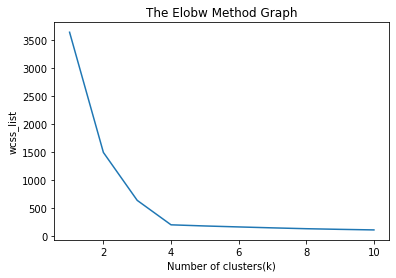

In [ ]:
wcss_list= []  #Initializing the list for the values of WCSS  
for i in range(1, 11):  
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 1)  
  kmeans.fit(x)  
  wcss_list.append(kmeans.inertia_)  


plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

The above graph indicates that our choice of choosing k = 4 was the optimal choice.
